## 아이솔레이션 포레스트
- 이상값을 식별하는 새로운 머신러닝 기법
- 정상값보다는 이상값을 찾는 데에 최적화 되어있음
- 데이터가 격리될 때까지 데이터는 연속적으로 파티셔닝
- 대규모 데이터셋을 다룰 때 KNN 대신 사용됨(KNN은 대규모 데이터셋에서 느림)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter04/data/covidtotals.csv')
covidtotals.set_index('iso_code',inplace=True)

In [3]:
# 표준화된 누적 데이터프레임 생성
analysisvars = ['location','total_cases_pm','total_deaths_pm','pop_density','median_age','gdp_per_capita']
standardizer=StandardScaler()
covidanalysis=covidtotals.loc[:,analysisvars].dropna()
covidanalysisstand=standardizer.fit_transform(covidanalysis.iloc[:,1:])


In [4]:
# 아이솔레이션 포레스트 모델을 실행해 이상값 탐지
clf=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1,max_features=1.0)
clf.fit(covidanalysisstand)

IsolationForest(contamination=0.1)

In [6]:
covidanalysis['anomaly']=clf.predict(covidanalysisstand)
covidanalysis['scores']=clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()

 1    157
-1     18
Name: anomaly, dtype: int64

In [7]:
# 정상값, 이상값 데이터프레임 생성
inlier, outlier = covidanalysis.loc[covidanalysis.anomaly==1],covidanalysis.loc[covidanalysis.anomaly==-1]
outlier[['location','total_cases_pm','total_deaths_pm','median_age','gdp_per_capita','scores']].sort_values(['scores']).head(10)

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
SGP,Singapore,5962.727,3.931,42.4,85535.383,-0.220787
QAT,Qatar,19753.146,13.190,31.9,116935.600,-0.213992
HKG,Hong Kong,0.000,0.000,44.8,56054.920,-0.186601
BEL,Belgium,5037.354,816.852,41.8,42658.576,-0.136649
BHR,Bahrain,6698.468,11.166,32.4,43290.705,-0.100546
LUX,Luxembourg,6418.776,175.726,39.7,94277.965,-0.097235
ITA,Italy,3853.985,552.663,47.9,35220.084,-0.088861
ESP,Spain,5120.952,580.197,45.5,34272.360,-0.051294
IRL,Ireland,5060.962,334.562,38.7,67335.293,-0.050646


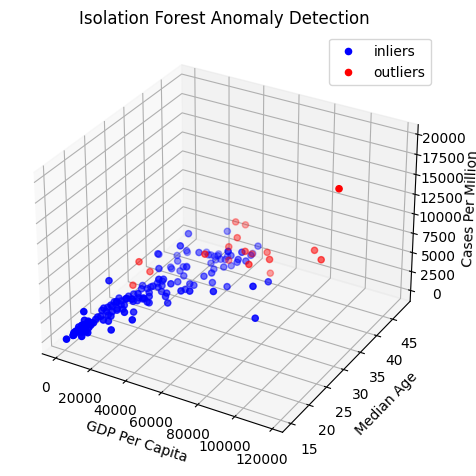

In [8]:
# 정상값, 이상값을 scatter3D로 나타내기 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel("Cases Per Million")
ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Median Age")
ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, label="inliers", c="blue")
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, label="outliers", c="red")
ax.legend()
plt.tight_layout()
plt.show()

## 결론
- KNN과 비슷하게 카타르, 싱가포르, 홍콩의 이상 점수가 가장 크다
- 벨기에 고려, 백만 명당 사망자가 데이터셋에서 가장 높아서?
- 위의 4개의 나라를 제외하고 분석해야한다.